## Linear regression project

An online clothing store (fake data) provides in-store style and clothing advice sessions. Customers visit the store, meet with personal stylists, and later order clothes they like using either a mobile app or the website.

The company is deciding where to put more effort: improving their mobile app or their website.

In [29]:
# Import necessary packages:  pandas, numpy, matplotlib, and seaborn

import pandas as pd ;print("pandas ", pd. __version__)
import numpy as np; print("numpy ",np. __version__)

#Visualisation packages
import matplotlib; print("matplotlib",matplotlib. __version__)
import matplotlib.pyplot as plt; 
import seaborn as sns ;print("seaborn ",sns. __version__)
%matplotlib inline 
# code to view the plots inside the notebook

pandas  1.4.2
numpy  1.20.0
matplotlib 3.7.2
seaborn  0.11.0


In [7]:
# Load the data
ecom_data = pd.read_csv("Ecommerce Customers")

In [8]:
# check the data

ecom_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
# Get the statistics of numerical columns
ecom_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
# Check the summary of the dataframe
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Exploratory data analysis (EDA)

In [12]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
sns.set_palette('Set2')

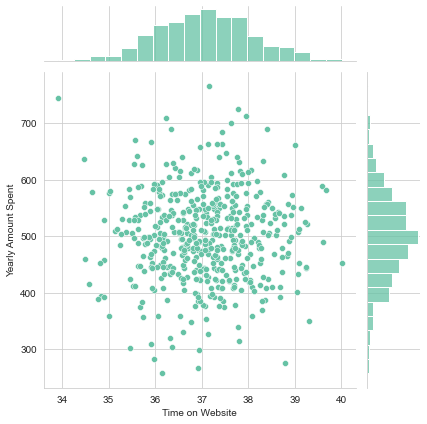

In [13]:
# jointplot to see the time on website vs yearly amount spent
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=ecom_data)

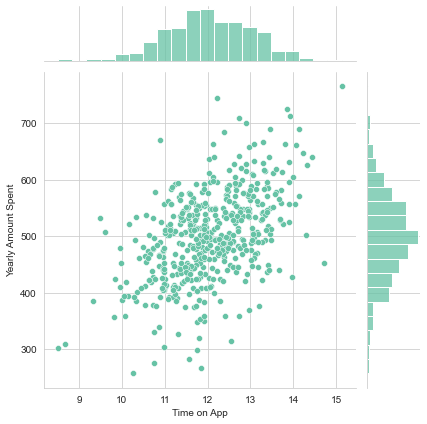

In [14]:
# jointplot to see the time on app vs yearly amount spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=ecom_data)

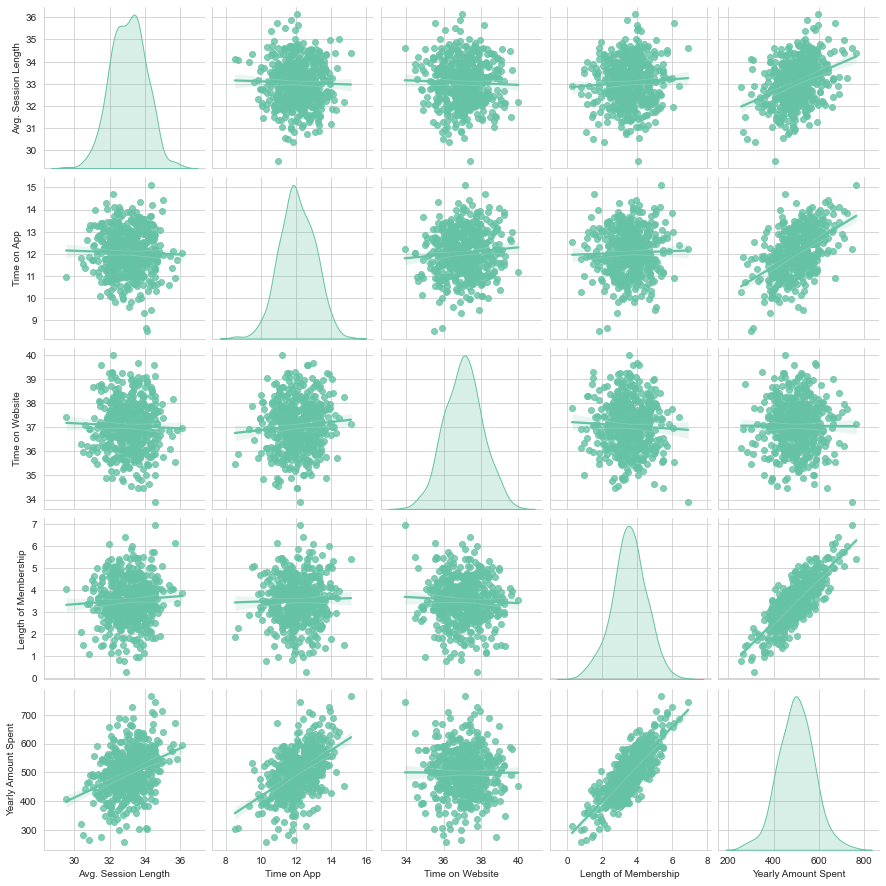

In [61]:
# check the pairwise relationship in the data
sns.pairplot(data=ecom_data, kind="reg", diag_kind="kde")


From the above plot, length of membership and time on app seems to be the most correlated feature with Yearly Amount Spent

In [34]:
# Create a linear model plot (lmplot) of Yearly Amount Spent vs. Length of Membership. 

Text(0.5, 1.0, 'Length of Membership vs Yearly Amount Spent')

<Figure size 576x576 with 0 Axes>

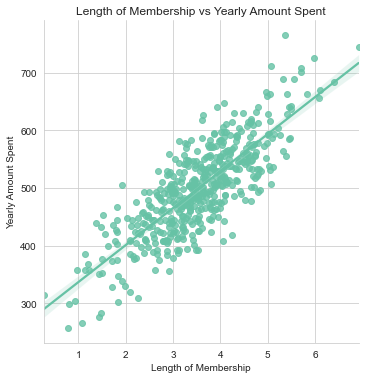

In [38]:
plt.figure(figsize=(8,8))
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=ecom_data)
plt.title('Length of Membership vs Yearly Amount Spent')

Text(0.5, 1.0, 'Time on App VS Yearly Amount Spent')

<Figure size 576x576 with 0 Axes>

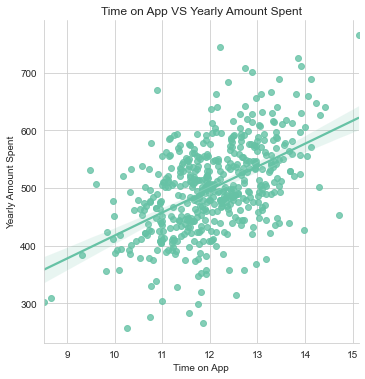

In [49]:
plt.figure(figsize=(8,8))
sns.lmplot(x='Time on App',y='Yearly Amount Spent',data=ecom_data)
plt.title('Time on App VS Yearly Amount Spent')

## Training and Testing Data


In [51]:
# let's split the data into training and testing sets. 
# Set a variable X equal to the numerical features of the e_customers and 
# a variable y equal to the "Yearly Amount Spent" column.

In [52]:
y = ecom_data['Yearly Amount Spent']

In [53]:
X = ecom_data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [54]:
# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. 
# Set test_size=0.3 and random_state=101 to get the reproducible result

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [57]:
# Train our model on our training data!
# Import sklearn     
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression()

In [68]:
# fit the linear model on the training data
lm.fit(X_train,y_train)

LinearRegression()

In [69]:
print("Intercept for the model is", lm.intercept_, "and the scope is",lm.coef_)

Intercept for the model is -1047.9327822502391 and the scope is [25.98154972 38.59015875  0.19040528 61.27909654]


In [67]:
# print the coefficients
print(lm.intercept_)
print('Coefficients: \n', lm.coef_)

-1047.9327822502391
Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


### Predicting Test Data


In [71]:
# let's evaluate our model performance by predicting off the test values!
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

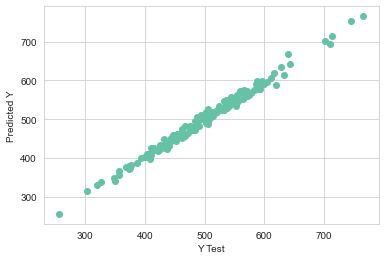

In [63]:
# scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model


Evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

 Calculate the 
-  Mean Absolute Error, 
-  Mean Squared Error, and 
-  Root Mean Squared Error.

In [65]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


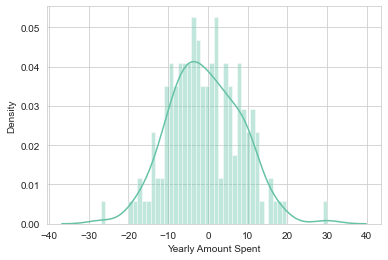

In [72]:
# Residuals- Plot a histogram of the residuals and make sure its normally distributed
sns.distplot((y_test-predictions),bins=50);

In [79]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [80]:
# 1 unit increase in variables is associated with an increase of corresponding coeffecient amount of dollars spent.

Upon analysis, it's clear that the time spent on the website lags behind the performance of the mobile app. **Deciding whether to focus on enhancing the website's performance or further developing the app** depends on additional contextual factors within the company. Exploring the correlation between the length of membership and either the app or the website would be crucial before reaching a definitive conclusion. Understanding these relationships would better guide the decision-making process.




